## GSAT trend patterns

In [1]:
# In[1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# %%
# define function
import src.SAT_function as data_process
import src.Data_Preprocess as preprocess

In [2]:
# Input the observational trend: original, forced and unforced
variable_name = ['60yr', '30yr', '10yr']
dir_in = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/Supp_obs_records/data/'

BEST_trend_original_da = {}
BEST_trend_forced_da = {}
BEST_trend_unforced_da = {}
for var in variable_name:
    print(var)
    BEST_trend_original_da[var] = xr.open_dataarray(dir_in + 'Raw_BEST_annual_' + var + '_trend.nc')
    BEST_trend_forced_da[var] = xr.open_dataarray(dir_in + 'BEST_annual_forced_' + var + '_trend.nc')
    BEST_trend_unforced_da[var] = xr.open_dataarray(dir_in + 'BEST_annual_internal_' + var + '_trend.nc')
    
BEST_pvalue_original_da = {}
BEST_pvalue_forced_da = {}
BEST_pvalue_unforced_da = {}
for var in variable_name:
    BEST_pvalue_original_da[var] = xr.open_dataarray(dir_in + 'Raw_BEST_annual_' + var + '_p_value.nc')
    BEST_pvalue_forced_da[var] = xr.open_dataarray(dir_in + 'BEST_annual_forced_' + var + '_p_value.nc')
    BEST_pvalue_unforced_da[var] = xr.open_dataarray(dir_in + 'BEST_annual_internal_' + var + '_p_value.nc')

60yr
30yr
10yr


In [ ]:
BEST_trend_original_da['60yr']

<xarray.DataArray (lat: 90, lon: 180)>
[16200 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

In [ ]:
BEST_pvalue_forced_da

{'60yr': <xarray.DataArray (lat: 90, lon: 180)>
 [16200 values with dtype=float64]
 Coordinates:
   * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
   * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0,
 '30yr': <xarray.DataArray (lat: 90, lon: 180)>
 [16200 values with dtype=float64]
 Coordinates:
   * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
   * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0,
 '10yr': <xarray.DataArray (lat: 90, lon: 180)>
 [16200 values with dtype=float64]
 Coordinates:
   * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
   * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0}

In [5]:
# arange data into a list arrocding to the variable name
trend_60yr = {"BEST Raw":BEST_trend_original_da['60yr'], 
            "Forced wrt. MMEM":BEST_trend_forced_da['60yr'], 
            "Unforced wrt. MMEM":BEST_trend_unforced_da['60yr']}
p_value_60yr = {"BEST Raw":BEST_pvalue_original_da['60yr'],
            "Forced wrt. MMEM":BEST_pvalue_forced_da['60yr'],
            "Unforced wrt. MMEM":BEST_pvalue_unforced_da['60yr']}
trend_30yr = {"BEST Raw":BEST_trend_original_da['30yr'],
            "Forced wrt. MMEM":BEST_trend_forced_da['30yr'],
            "Unforced wrt. MMEM":BEST_trend_unforced_da['30yr']}
p_value_30yr = {"BEST Raw":BEST_pvalue_original_da['30yr'],
            "Forced wrt. MMEM":BEST_pvalue_forced_da['30yr'],
            "Unforced wrt. MMEM":BEST_pvalue_unforced_da['30yr']}
trend_10yr = {"BEST Raw":BEST_trend_original_da['10yr'],
            "Forced wrt. MMEM":BEST_trend_forced_da['10yr'],
            "Unforced wrt. MMEM":BEST_trend_unforced_da['10yr']}
p_value_10yr = {"BEST Raw":BEST_pvalue_original_da['10yr'],
            "Forced wrt. MMEM":BEST_pvalue_forced_da['10yr'],
            "Unforced wrt. MMEM":BEST_pvalue_unforced_da['10yr']}

In [6]:
trend_60yr

{'BEST Raw': <xarray.DataArray (lat: 90, lon: 180)>
 [16200 values with dtype=float64]
 Coordinates:
   * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
   * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0,
 'Forced wrt. MMEM': <xarray.DataArray (lat: 90, lon: 180)>
 [16200 values with dtype=float64]
 Coordinates:
   * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
   * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0,
 'Unforced wrt. MMEM': <xarray.DataArray (lat: 90, lon: 180)>
 [16200 values with dtype=float64]
 Coordinates:
   * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
   * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0}

### Plotting with the Robinson Projections

In [7]:
plt.rcParams['figure.figsize'] = (8, 10)
plt.rcParams['font.size'] = 16
# plt.rcParams['font.family'] = "serif"
# plt.rcParams['font.serif'] = "Arial"
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.right'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.1
plt.rcParams['savefig.transparent'] = True
plt.rcParams['pdf.fonttype'] = 42
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "Helvetica"
# })

In [8]:
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.colors import BoundaryNorm
import cartopy.util as cutil
import seaborn as sns
import matplotlib.colors as mcolors
import palettable
#  cmap = mcolors.ListedColormap(palettable.scientific.diverging.Vik_20.mpl_colors)
cmap=mcolors.ListedColormap(palettable.cmocean.diverging.Balance_20.mpl_colors)

In [9]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import seaborn as sns

def plot_trend_with_significance(trend_data, lats, lons, p_values, GMST_p_values=None, levels=None, extend=None, cmap=None, 
                                 title="", ax=None, show_xticks=False, show_yticks=False):
    """
    Plot the trend spatial pattern using Robinson projection with significance overlaid.

    Parameters:
    - trend_data: 2D numpy array with the trend values.
    - lats, lons: 1D arrays of latitudes and longitudes.
    - p_values: 2D array with p-values for each grid point.
    - GMST_p_values: 2D array with GMST p-values for each grid point.
    - title: Title for the plot.
    - ax: Existing axis to plot on. If None, a new axis will be created.
    - show_xticks, show_yticks: Boolean flags to show x and y axis ticks.
    
    Returns:
    - contour_obj: The contour object from the plot.
    """

    # Create a new figure/axis if none is provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 25), subplot_kw={'projection': ccrs.Robinson()})
        ax.set_global()
  
    # Determine significance mask (where p-values are less than 0.05)
    insignificance_mask = p_values >= 0.05
    # Plotting
    # contour_obj = ax.pcolormesh(lons, lats, trend_data,  cmap='RdBu_r',vmin=-5.0, vmax=5.0, transform=ccrs.PlateCarree(central_longitude=180), shading='auto')
    contour_obj = ax.contourf(lons, lats, trend_data, levels=levels, extend=extend, cmap=cmap, transform=ccrs.PlateCarree(central_longitude=0))

    # Plot significance masks with different hatches
    ax.contourf(lons, lats, insignificance_mask, levels=[0, 0.05, 1.0],hatches=[None,'///'], colors='none', transform=ccrs.PlateCarree())

    ax.coastlines(resolution='110m')
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,
                      color='gray', alpha=0.35, linestyle='--')

    # Disable labels on the top and right of the plot
    gl.top_labels = False
    gl.right_labels = False

    # Enable labels on the bottom and left of the plot
    gl.bottom_labels = show_xticks
    gl.left_labels = show_yticks
    gl.xformatter = cticker.LongitudeFormatter()
    gl.yformatter = cticker.LatitudeFormatter()
    gl.xlabel_style = {'size': 16}
    gl.ylabel_style = {'size': 16}
    
    if show_xticks:
        gl.bottom_labels = True
    if show_yticks:
        gl.left_labels = True
    
    ax.set_title(title, loc='center', fontname='Arial',fontsize=20, pad=5.0)

    return contour_obj


In [10]:
def plot_trend(trend_data, lats, lons, levels=None, extend=None, cmap=None, 
                                 title="", ax=None, show_xticks=False, show_yticks=False):
    """
    Plot the trend spatial pattern using Robinson projection with significance overlaid.

    Parameters:
    - trend_data: 2D numpy array with the trend values.
    - lats, lons: 1D arrays of latitudes and longitudes.
    - p_values: 2D array with p-values for each grid point.
    - GMST_p_values: 2D array with GMST p-values for each grid point.
    - title: Title for the plot.
    - ax: Existing axis to plot on. If None, a new axis will be created.
    - show_xticks, show_yticks: Boolean flags to show x and y axis ticks.
    
    Returns:
    - contour_obj: The contour object from the plot.
    """

    # Create a new figure/axis if none is provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 25), subplot_kw={'projection': ccrs.Robinson()})
        ax.set_global()
  
    # Plotting
    # contour_obj = ax.pcolormesh(lons, lats, trend_data,  cmap='RdBu_r',vmin=-5.0, vmax=5.0, transform=ccrs.PlateCarree(central_longitude=180), shading='auto')
    contour_obj = ax.contourf(lons, lats, trend_data, levels=levels, extend=extend, cmap=cmap, transform=ccrs.PlateCarree(central_longitude=0))

    ax.coastlines(resolution='110m')
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,
                      color='gray', alpha=0.35, linestyle='--')

    # Disable labels on the top and right of the plot
    gl.top_labels = False
    gl.right_labels = False

    # Enable labels on the bottom and left of the plot
    gl.bottom_labels = show_xticks
    gl.left_labels = show_yticks
    gl.xformatter = cticker.LongitudeFormatter()
    gl.yformatter = cticker.LatitudeFormatter()
    gl.xlabel_style = {'size': 16}
    gl.ylabel_style = {'size': 16}
    
    if show_xticks:
        gl.bottom_labels = True
    if show_yticks:
        gl.left_labels = True
    
    ax.set_title(title, loc='center', fontname='Arial', fontsize=20, pad=5.0)

    return contour_obj

### Plot the Original, Forced, MMEM trend patterns

In [11]:
# reattribute the units for the trend
variable_name = ["BEST Raw", "Forced wrt. MMEM", "Unforced wrt. MMEM"]
# degC/60yr, 30yr, 10yr
for i in range(len(variable_name)):
    trend_60yr[variable_name[i]] = trend_60yr[variable_name[i]]*10
    trend_30yr[variable_name[i]] = trend_30yr[variable_name[i]]*10
    trend_10yr[variable_name[i]] = trend_10yr[variable_name[i]]*10

In [12]:
# check the min and max of the trend
for i in range(len(variable_name)):
    print(variable_name[i])
    print(trend_60yr[variable_name[i]].min().values, trend_60yr[variable_name[i]].max().values)
    print(trend_30yr[variable_name[i]].min().values, trend_30yr[variable_name[i]].max().values)
    print(trend_10yr[variable_name[i]].min().values, trend_10yr[variable_name[i]].max().values)

BEST Raw
-0.1167938822009066 1.3252972164347232
-0.34215428750030696 2.0082614421844482
-7.1330790519714355 5.129963397979736
Forced wrt. MMEM
-0.1606735074151317 1.0291136278395727
-0.21095798012072703 1.3511856169469796
-0.2125617358730031 1.3614576706722326
Unforced wrt. MMEM
-0.3393247843881654 0.5555922417107507
-0.9141242789635711 1.2019490066470977
-7.989841854527963 4.352876782716109


In [13]:
# define an asymmetric colormap
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.colors import BoundaryNorm
import cartopy.util as cutil
import seaborn as sns
import matplotlib.colors as mcolors
import palettable


In [14]:
# Plotting
"""
first column: original trend and p-value
second column: forced trend and p-value
third column: unforced trend and p-value
each row is a different time period
"""
lat = trend_60yr['BEST Raw'].lat
lon = trend_60yr['BEST Raw'].lon
lat, lon 

(<xarray.DataArray 'lat' (lat: 90)>
 array([-89., -87., -85., -83., -81., -79., -77., -75., -73., -71., -69., -67.,
        -65., -63., -61., -59., -57., -55., -53., -51., -49., -47., -45., -43.,
        -41., -39., -37., -35., -33., -31., -29., -27., -25., -23., -21., -19.,
        -17., -15., -13., -11.,  -9.,  -7.,  -5.,  -3.,  -1.,   1.,   3.,   5.,
          7.,   9.,  11.,  13.,  15.,  17.,  19.,  21.,  23.,  25.,  27.,  29.,
         31.,  33.,  35.,  37.,  39.,  41.,  43.,  45.,  47.,  49.,  51.,  53.,
         55.,  57.,  59.,  61.,  63.,  65.,  67.,  69.,  71.,  73.,  75.,  77.,
         79.,  81.,  83.,  85.,  87.,  89.])
 Coordinates:
   * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
 Attributes:
     standard_name:  latitude
     long_name:      latitude
     units:          degrees_north
     axis:           Y,
 <xarray.DataArray 'lon' (lon: 180)>
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,
         24., 

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' 

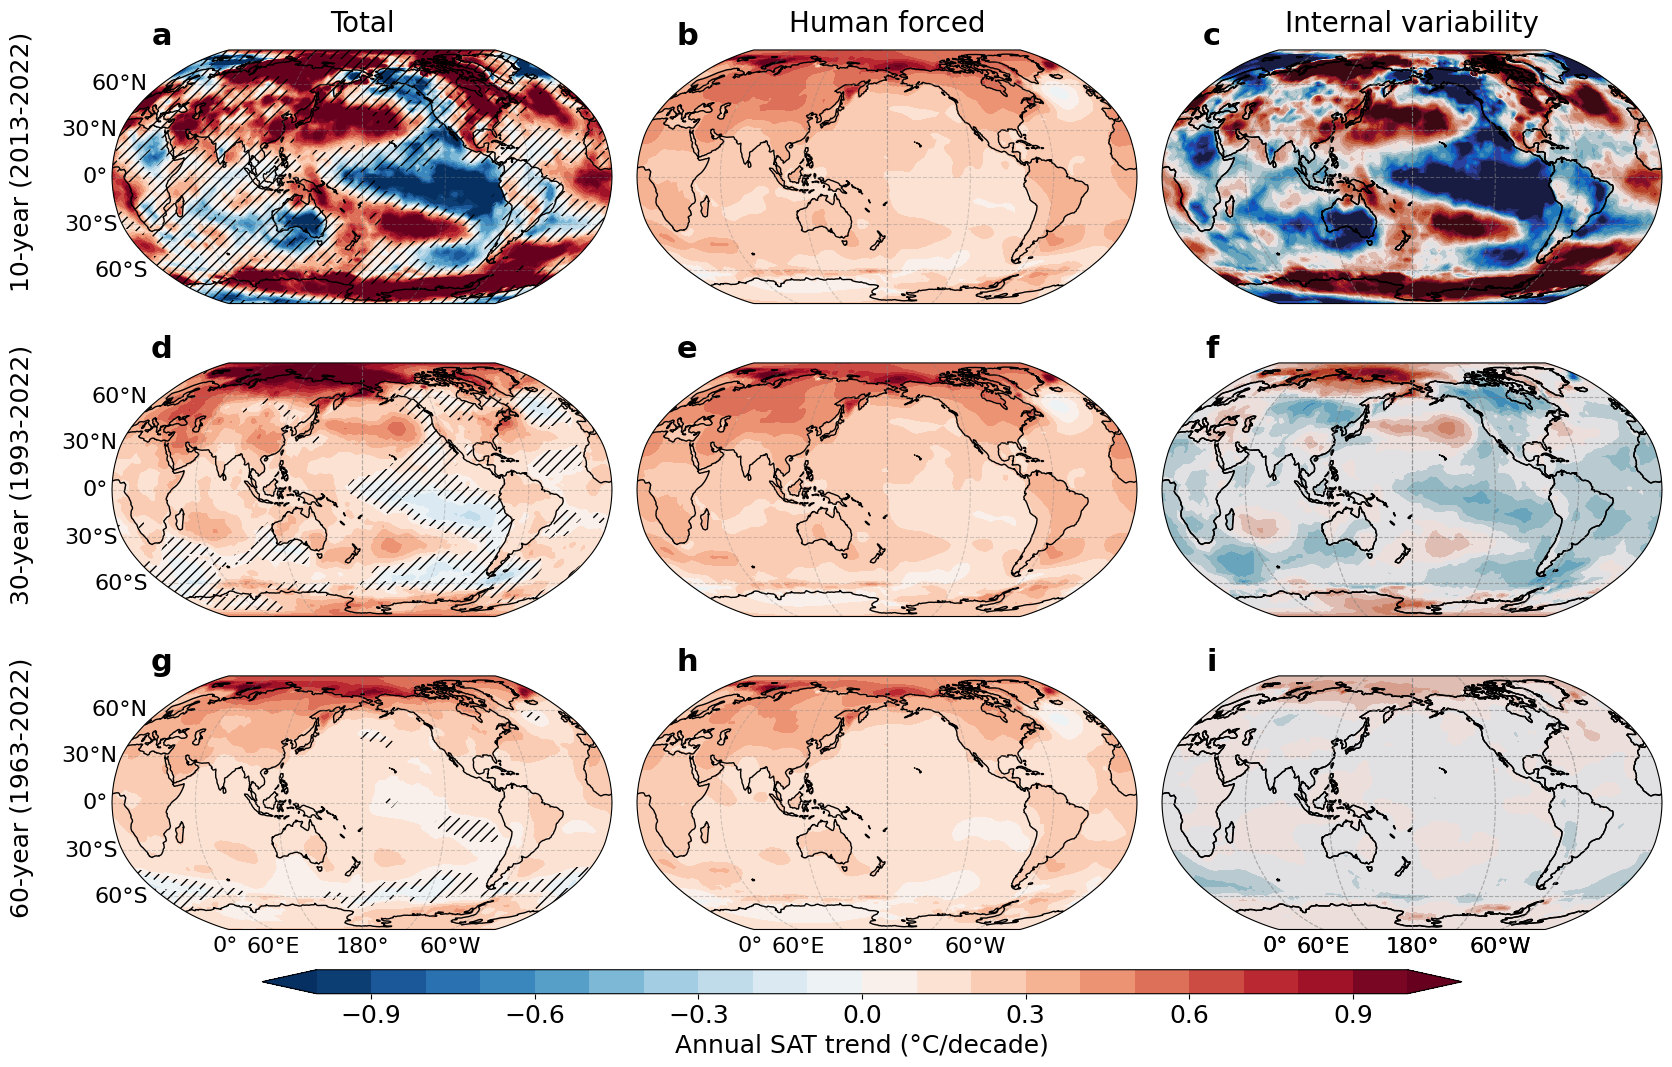

In [15]:
# titles =["Raw Trend",  "Forced Trend"+ r'$_{wrt.MMEM} $', 
#     "Unforced Trend"+ r'$_{wrt.MMEM} $']
titles =["Total",  "Human forced", "Internal variability"]
titles_rows = ["10-year (2013-2022)", "30-year (1993-2022)", "60-year (1963-2022)"]
titles_left_corner = ["a", "b", "c", "d", "e", "f", "g", "h", "i"]

periods = ["10yr", "30yr", "60yr"]
variable_name = ["BEST Raw", "Forced wrt. MMEM", "Unforced wrt. MMEM"]
intervals = np.arange(-1.0, 1.1, 0.1)
# cmap = mcolors.ListedColormap(palettable.scientific.diverging.Vik_20.mpl_colors)

fig = plt.figure(figsize=(20, 12))
gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1], wspace=0.05, hspace=0.05)

extend='both'
# Create a 3x3 grid of subplots
axes = {}
for i, period in enumerate(periods):
    for j, var in enumerate(variable_name):
        is_left = j == 0
        is_bottom_row = i >= 2
        
        ax = plt.subplot(gs[i, j], projection=ccrs.Robinson(180))
        ax.set_global()
        axes[i, j] = ax
        if i == 0:
            ax.text(0.5, 1.05, titles[j], va='bottom', ha='center', rotation='horizontal',
                    fontsize=20, transform=ax.transAxes)
        
        if i == 0 and j < 2:
            # Add cyclic points
            trend_data = trend_10yr[var]
            p_values = p_value_10yr[var]
            trend_with_cyclic, lons_cyclic = cutil.add_cyclic_point(trend_data, coord=lon)
            p_values_with_cyclic, lons_cyclic = cutil.add_cyclic_point(p_values, coord=lon)
            contour_obj = plot_trend_with_significance(trend_with_cyclic, lat, lons_cyclic, p_values_with_cyclic, 
                                                       levels=intervals, extend=extend,
                                                       cmap='RdBu_r', title=" ", ax=ax, show_xticks = is_bottom_row, show_yticks = is_left)
        elif i == 1 and j < 2:
            trend_data = trend_30yr[var]
            p_values = p_value_30yr[var]
            trend_with_cyclic, lons_cyclic = cutil.add_cyclic_point(trend_data, coord=lon)
            p_values_with_cyclic, lons_cyclic = cutil.add_cyclic_point(p_values, coord=lon)
            
            contour_obj1 = plot_trend_with_significance(trend_with_cyclic, lat, lons_cyclic, p_values_with_cyclic, 
                                                        levels=intervals,extend=extend,
                                                        cmap='RdBu_r', title=" ", ax=ax, show_xticks = is_bottom_row, show_yticks = is_left)
        else:
            trend_data = trend_60yr[var]
            p_values = p_value_60yr[var]
            trend_with_cyclic, lons_cyclic = cutil.add_cyclic_point(trend_data, coord=lon)
            p_values_with_cyclic, lons_cyclic = cutil.add_cyclic_point(p_values, coord=lon)
            
            contour_obj2 = plot_trend_with_significance(trend_with_cyclic, lat, lons_cyclic, p_values_with_cyclic, 
                                                        levels=intervals, extend=extend,
                                                        cmap='RdBu_r', title=" ", ax=ax, show_xticks = is_bottom_row, show_yticks = is_left)
        if i ==0 and j == 2:
            trend_da_10yr = trend_10yr[var]
        
            trend_10yr_cyclic, lons_cyclic = cutil.add_cyclic_point(trend_da_10yr, coord=lon)
            contour_obj3 = plot_trend(trend_10yr_cyclic, lat, lons_cyclic, levels=intervals, extend=extend, cmap=cmap, title=" ", ax=ax, show_xticks = is_bottom_row, show_yticks = is_left)
        elif i == 1 and j == 2:
            trend_da_30yr = trend_30yr[var]
            trend_30yr_cyclic, lons_cyclic = cutil.add_cyclic_point(trend_da_30yr, coord=lon)
            contour_obj4 = plot_trend(trend_30yr_cyclic, lat, lons_cyclic, levels=intervals, extend=extend, cmap=cmap, title=" ", ax=ax, show_xticks = is_bottom_row, show_yticks = is_left)
        elif i == 2 and j == 2:
            trend_da_60yr = trend_60yr[var]
            trend_60yr_cyclic, lons_cyclic = cutil.add_cyclic_point(trend_da_60yr, coord=lon)
            
            contour_obj5 = plot_trend(trend_60yr_cyclic, lat, lons_cyclic, levels=intervals, extend=extend, cmap=cmap, title=" ", ax=ax, show_xticks = is_bottom_row, show_yticks = is_left)
              
# add the title for each subplot
for i, period in enumerate(periods):
    for j, var in enumerate(variable_name):
        axes[i, j].text(0.1, 1.0, titles_left_corner[i*3+j], va='bottom', ha='center', rotation='horizontal', weight='bold', fontsize=22, transform=axes[i, j].transAxes)
        
# add text to the left side of the figure weight='bold'
for i in range(3):
    axes[i, 0].text(-0.18, 0.05, titles_rows[i], va='bottom', ha='center', rotation=90, fontsize=18, transform=axes[i, 0].transAxes)

cbar_ax = fig.add_axes([0.2, 0.075, 0.6, 0.02])
cbar = fig.colorbar(contour_obj, cax=cbar_ax, orientation='horizontal',extend= extend)
# fig.text(0.915, 0.038,'Annual SAT trend ($^\circ$C/decade)',fontsize=18, ha='center', va='bottom')
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Annual SAT trend (°C/decade)', fontsize=18)

fig.savefig('BEST-SAT-trend.png', dpi=300, bbox_inches='tight')
fig.savefig('BEST-SAT-trend.eps', format='eps', dpi=300, bbox_inches='tight')
fig.savefig('BEST-SAT-trend.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()